In [1]:
# Imports 

import spacy
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from spacy import displacy

In [2]:
# Ste up spaCy NLP

model = "la_dep_cltk_md" 
nlp = spacy.load(model)

In [3]:
# Get sample text; first story from Ritchie's fables

text = """Haec dicuntur narranturque a poetis de Perseo. Perseus filius erat Iovis, maximi deorum; avus eius Acrisius appellabatur. Acrisius volebat Perseum nepotem suum necare; nam propter oraculum puerum timebat. Comprehendit igitur Perseum adhuc infantem, et cum matre in arca lignea inclusit. Tum arcam ipsam in mare coniecit. Danae, Persei mater, magnopere territa est; tempestas enim magna mare turbabat. Perseus autem in sinu matris dormiebat."""

In [4]:
# Create spacy Doc object

doc = nlp(text)

In [5]:
# Helper function
def enumerate_print(l):
    for i, x in enumerate(l, 1):
        print(f"{i}: {x}")

In [6]:
# Get sentences from text

sents = doc.sents

enumerate_print(sents)

1: Haec dicuntur narranturque a poetis de Perseo.
2: Perseus filius erat Iovis, maximi deorum;
3: avus eius Acrisius appellabatur.
4: Acrisius volebat Perseum nepotem suum necare;
5: nam propter oraculum puerum timebat.
6: Comprehendit igitur Perseum adhuc infantem, et cum matre in arca lignea inclusit.
7: Tum arcam ipsam in mare coniecit.
8: Danae, Persei mater, magnopere territa est;
9: tempestas enim magna mare turbabat.
10: Perseus autem in sinu matris dormiebat.


In [7]:
# Get tokens from text

for token in doc:
    print(token)
    print(type(token))
    print([item for item in dir(token) if not item.startswith("_")])
    break

Haec
<class 'spacy.tokens.token.Token'>
['ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_dep', 'has_extension', 'has_head', 'has_morph', 'has_vector', 'head', 'i', 'idx', 'iob_strings', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_end', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex', 'lex_id', 'like_email', 'like_num', 'like_url', 'lower', 'lower_', 'morph', 'n_lefts', 'n_rights', 'nbor', 'norm', 'norm_', 'orth', 'orth_', 'pos', 'pos_', 'prefix', 'prefix_', 'prob', 'rank', 'remove_extension', 'right_edge', 'rights', 'sent', 'sent_start', 'sentiment', 'set_extension', 'set_morph', 'shape', 'shape_', 'similarity', 'subtree', 'suffix'

In [8]:
# Make dataframe with token attributes

data = []

for token in doc[:25]:
    data.append(
        [
            token.text,
            token.norm_,
            token.lower_,
            token.lemma_,
            token.pos_,
            token.tag_,
            token.dep_,
            token.has_vector,
            token.morph,
            token.text in nlp.vocab,
            token.is_oov,
        ]
    )

df = pd.DataFrame(
    data,
    columns=[
        "text",
        "norm",
        "lower",
        "lemma",
        "pos",
        "tag",
        "dep",
        "has_vector",
        "morph",
        "in_vocab",
        "is_oov",
    ],
)

df

,text,norm,lower,lemma,pos,tag,dep,has_vector,morph,in_vocab,is_oov
0,Haec,haec,haec,hic,DET,pronoun,nsubj:pass,True,"(Case=Nom, Gender=Neut, Number=Plur)",True,False
1,dicuntur,dicuntur,dicuntur,dico,VERB,verb,ROOT,True,"(Mood=Ind, Number=Plur, Person=3, Tense=Pres, ...",True,False
2,narrantur,narrantur,narrantur,narro,VERB,verb,conj,True,"(Mood=Ind, Number=Plur, Person=3, Tense=Pres, ...",True,False
3,que,que,que,que,CCONJ,conjunction,cc,True,(),True,False
4,a,a,a,ab,ADP,preposition,case,True,(),True,False
5,poetis,poetis,poetis,poetus,NOUN,noun,obl:agent,True,"(Case=Abl, Gender=Masc, Number=Plur)",True,False
6,de,de,de,de,ADP,preposition,case,True,(),True,False
7,Perseo,perseo,perseo,Perseo,PROPN,proper_noun,nmod,True,"(Case=Abl, Gender=Masc, Number=Sing)",True,False
8,.,.,.,.,PUNCT,punc,punct,True,(),True,False
9,Perseus,perseus,perseus,Perseus,NOUN,noun,nsubj,True,"(Case=Nom, Gender=Masc, Number=Sing)",True,False


In [9]:
# Show dependency parse for sample sentence

sents = doc.sents

for sent in sents:
    print(f'spaCy dependecy parse for "{sent}"')
    displacy.render(sent, style="dep")
    break

spaCy dependecy parse for "Haec dicuntur narranturque a poetis de Perseo."


In [10]:
# Noun chunks not implemented yet--TK

In [11]:
## NER not implemented yet--TK

In [12]:
# Plot vectors with TSNE based on Ritchie's fables

with open('ritchies.txt', 'r') as f:
    contents = f.readlines()
    text = " ".join([line.strip() for line in contents if line.strip() and not line.startswith('#')])
    doc = nlp(text)

In [13]:
# Extract vectors for text

vector_dict = {item.norm_: item.vector for item in doc}
words = list(vector_dict.keys())
vecs = list(vector_dict.values())

In [14]:
# Reduce vectors to 2D with TSNE; make dataframe

tsne = TSNE(n_components=2, perplexity=100, random_state=42)
reduced_vecs = tsne.fit_transform(np.asarray(vecs))
df = pd.DataFrame(reduced_vecs, index=words, columns=['x', 'y'])
df['word'] = df.index

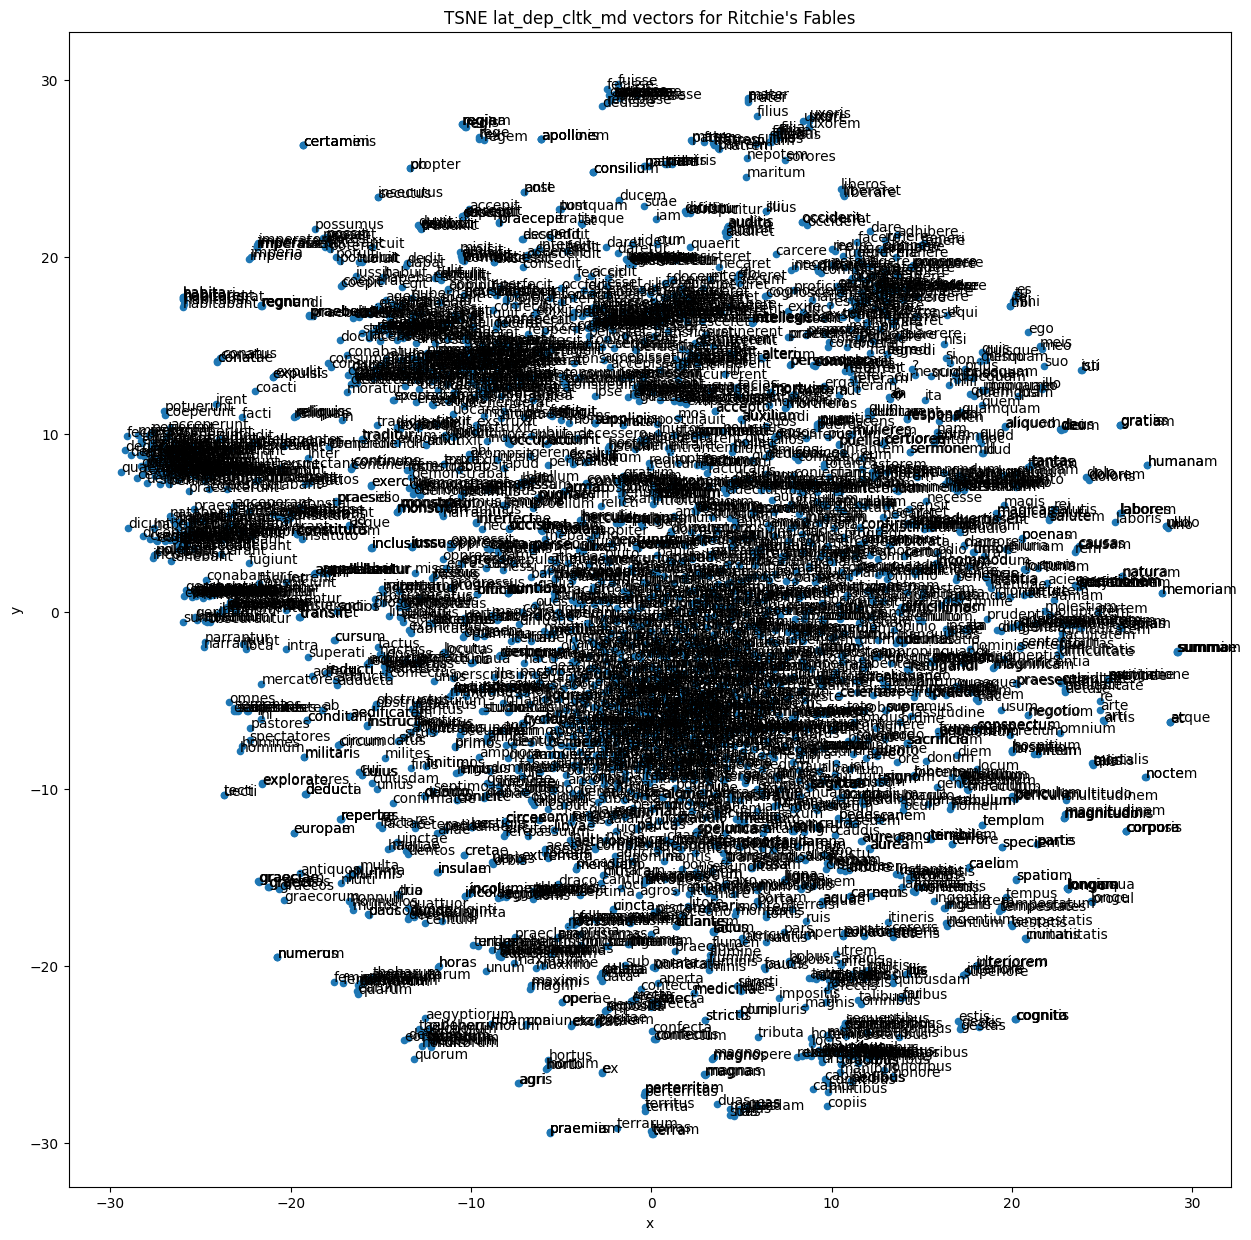

In [15]:
# Plot TSNE

ax = df.plot(kind='scatter', x='x', y='y', figsize=(15, 15), title="TSNE lat_dep_cltk_md vectors for Ritchie's Fables")

for idx, row in df.iterrows():
    ax.annotate(row['word'], (row['x'], row['y']))

In [16]:
# Clearer with fewer elements; so only proper_nouns; extract vectors for text

vector_dict = {}

for item in doc:
    if item.tag_ == "proper_noun":
        vector_dict[item.norm_] = item.vector
        
words = list(vector_dict.keys())
vecs = list(vector_dict.values())

In [17]:
# Reduce vectors to 2D with TSNE; make dataframe

tsne = TSNE(n_components=2, perplexity=3, random_state=42)
reduced_vecs = tsne.fit_transform(np.asarray(vecs))
df = pd.DataFrame(reduced_vecs, index=words, columns=['x', 'y'])
df['word'] = df.index

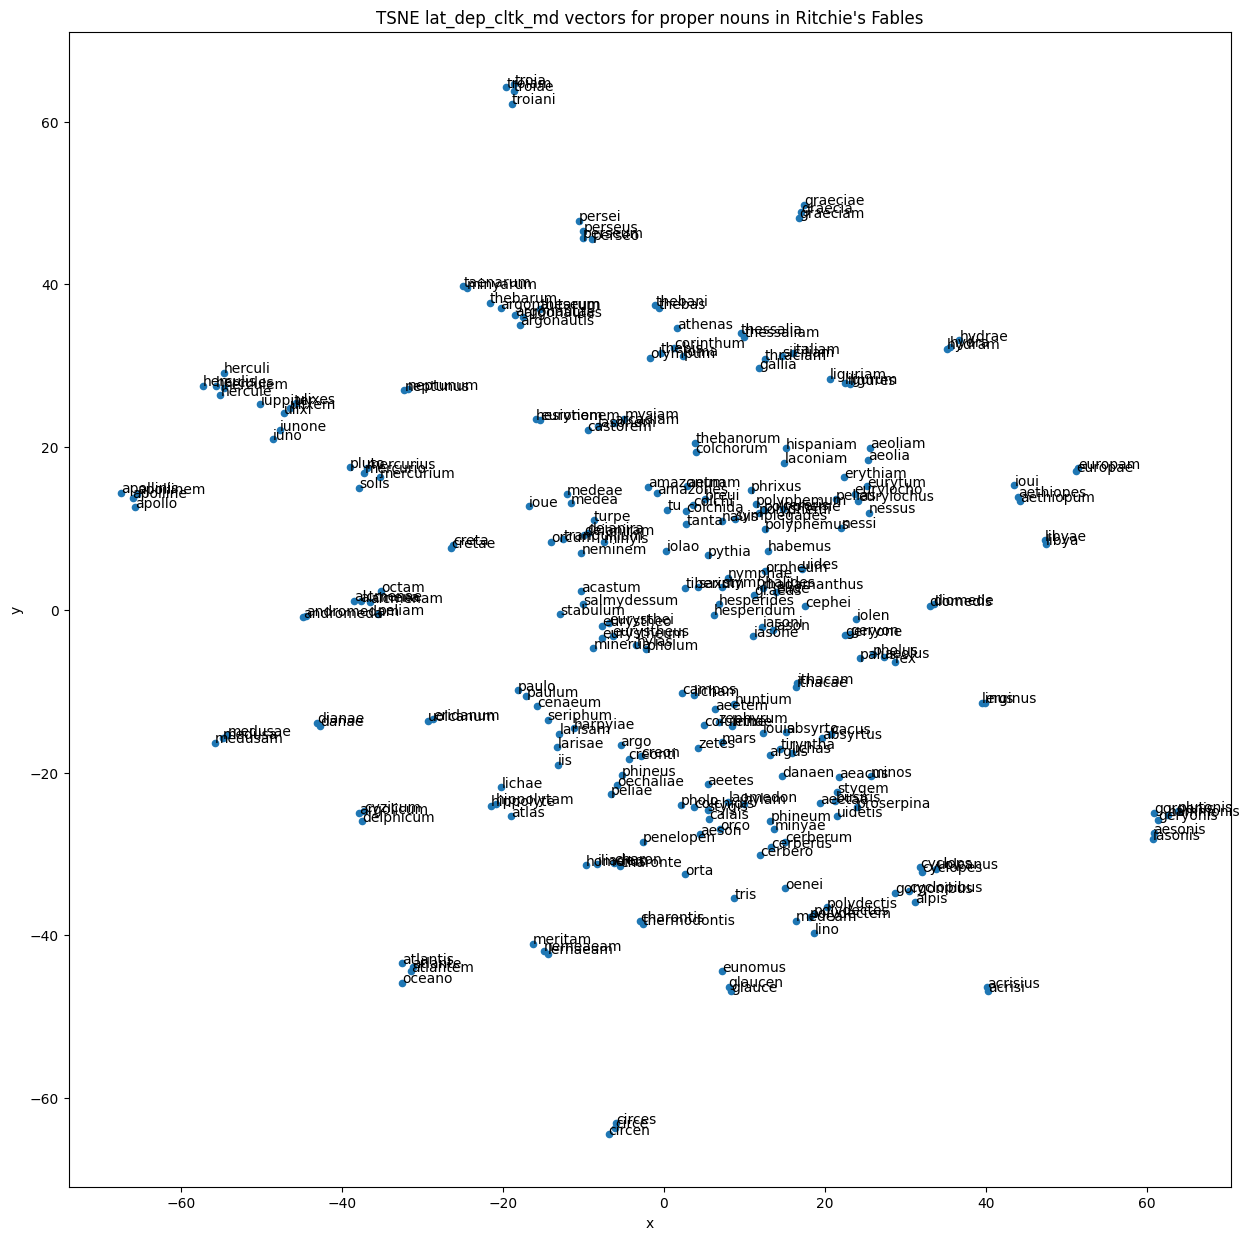

In [18]:
# Plot TSNE

ax = df.plot(kind='scatter', x='x', y='y', figsize=(15, 15), title="TSNE lat_dep_cltk_md vectors for proper nouns in Ritchie's Fables")

for idx, row in df.iterrows():
    ax.annotate(row['word'], (row['x'], row['y']))